In [6]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
mesh_dir = '/glade/work/afoster/FATES_calibration/mesh_files'
dom_pfts_file = 'dominant_pft_grid_update.nc'
codom_pfts_file = 'co_dominant_pft_grid_update.nc'

In [8]:
dom_pfts_file_new = 'dominant_pft_grid_fatesctsm6.nc'
codom_pfts_file_new = 'co_dominant_pft_grid_fatesctsm6.nc'

In [9]:
dom_pfts = xr.open_dataset(os.path.join(mesh_dir, dom_pfts_file))
co_doms = xr.open_dataset(os.path.join(mesh_dir, codom_pfts_file))

dom_pfts_new = xr.open_dataset(os.path.join(mesh_dir, dom_pfts_file_new))
co_doms_new = xr.open_dataset(os.path.join(mesh_dir, codom_pfts_file_new))

In [15]:
np.unique(dom_pfts.pft)

array([ 1.,  2.,  3., 12., 13., 14., nan])

In [16]:
np.unique(dom_pfts_new.pft)

array([ 1.,  2.,  3., 10., 11., 12., nan])

In [11]:
colors = ['#23B44E', '#496041', '#F15A46', '#1DB58C', '#88F6E5', '#FFBF02',
          '#AADC32', '#AB2F5D', '#AB2F5D', '#738678', '#9DC183', '#2C728E', '#FFF3B0', 
          '#E09F3F', '#BCB06F', '#9C9478']
pfts = ["broadleaf_evergreen_tropical_tree", "needleleaf_evergreen_extratrop_tree",
       "needleleaf_colddecid_extratrop_tree", "broadleaf_evergreen_extratrop_tree",
       "broadleaf_hydrodecid_tropical_tree", "broadleaf_colddecid_extratrop_tree",
       "broadleaf_evergreen_extratrop_shrub", "broadleaf_hydrodecid_extratrop_shrub",
       "broadleaf_colddecid_extratrop_shrub", "broadleaf_evergreen_arctic_shrub",
       "broadleaf_colddecid_arctic_shrub", "arctic_c3_grass", "cool_c3_grass",
       "c4_grass", "c3_crop", "c3_irrigated"]

/glade/derecho/scratch/afoster/tmp/ipykernel_71190/3947429834.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])


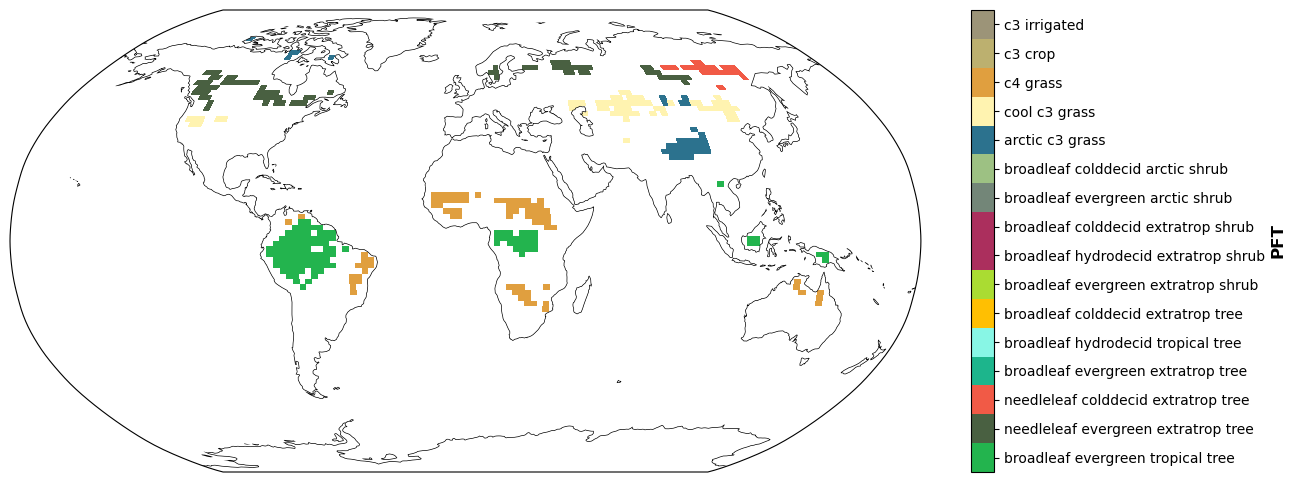

In [12]:
cmap = matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(figsize=(13, 6),
                   subplot_kw=dict(projection=ccrs.Robinson()))
ax.coastlines()
ocean = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m',
                                                facecolor='white'))

pcm = ax.pcolormesh(dom_pfts.lon, dom_pfts.lat, dom_pfts.pft,
                transform=ccrs.PlateCarree(), shading='auto',
                cmap=cmap, vmin=0.5,
                vmax=16.5)
cbar = fig.colorbar(pcm, ax=ax, fraction=0.03, orientation='vertical')
cbar.set_label('PFT', size=12, fontweight='bold')
cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

/glade/derecho/scratch/afoster/tmp/ipykernel_71190/881179292.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])


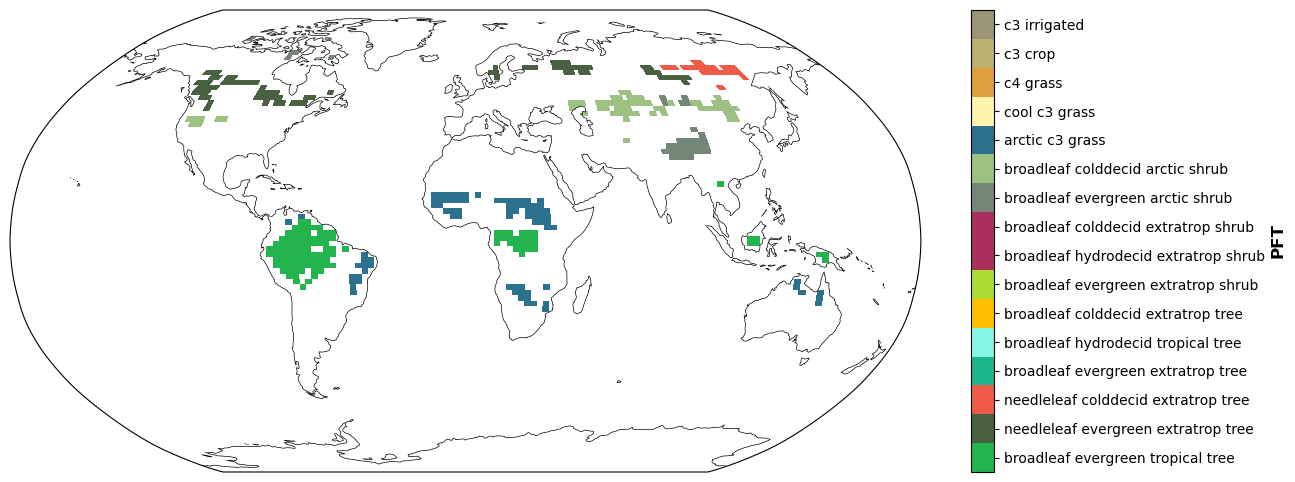

In [13]:
cmap = matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(figsize=(13, 6),
                   subplot_kw=dict(projection=ccrs.Robinson()))
ax.coastlines()
ocean = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m',
                                                facecolor='white'))

pcm = ax.pcolormesh(dom_pfts_new.lon, dom_pfts_new.lat, dom_pfts_new.pft,
                transform=ccrs.PlateCarree(), shading='auto',
                cmap=cmap, vmin=0.5,
                vmax=16.5)
cbar = fig.colorbar(pcm, ax=ax, fraction=0.03, orientation='vertical')
cbar.set_label('PFT', size=12, fontweight='bold')
cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

/glade/derecho/scratch/afoster/tmp/ipykernel_61564/3546340512.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])


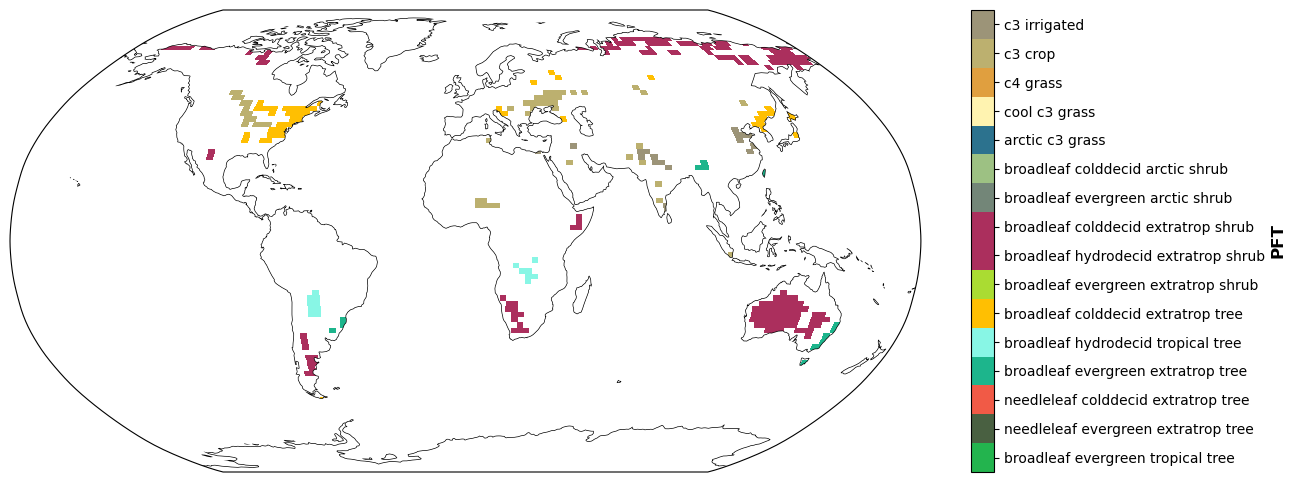

In [6]:
cmap = matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(figsize=(13, 6),
                   subplot_kw=dict(projection=ccrs.Robinson()))
ax.coastlines()
ocean = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m',
                                                facecolor='white'))

pcm = ax.pcolormesh(co_doms.lon, co_doms.lat, co_doms.pft,
                transform=ccrs.PlateCarree(), shading='auto',
                cmap=cmap, vmin=0.5,
                vmax=16.5)
cbar = fig.colorbar(pcm, ax=ax, fraction=0.03,
                orientation='vertical')
cbar.set_label('PFT', size=12, fontweight='bold')
cbar.set_ticklabels([pft.replace('_', ' ') for pft in pfts])
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [105]:
param=xr.open_dataset('/glade/campaign/cesm/cesmdata/inputdata/lnd/clm2/paramdata/ctsm60_params.c241017.nc')

In [114]:
def make_param_list(param_data, out_file):
    
    df_list = []
    for parameter in param_data.data_vars:
        dims = [dim for dim in param_data[parameter].dims]
        print(param_data[parameter].attrs)
        # ln = param_data[parameter].attrs.long_name
        # df = pd.DataFrame({'parameter_name': [parameter],
        #                   'coord': [dims],
        #                    'long_name': [ln],
        #                   })
        # for attr in attrs:
        #     df[attr] = attrs[attr]
        # df_list.append(df)
    param_df = pd.concat(df_list)
    #param_df.to_csv(out_file)

    return param_df

In [137]:
all_params = [p for p in param.data_vars]
oaat_key = pd.read_csv('/glade/work/linnia/CLM6-PPE/CLM6SP_OAAT/clm6sp_oaat.csv', header=None)
oaat_key.columns=['ensemble', 'param', 'minmax']

In [138]:
oaat_params = np.unique(oaat_key.param)

In [139]:
missing_params = []
for param in all_params:
    if param not in oaat_params:
        missing_params.append(param)

In [140]:
missing_params

['C2_liq_Brun89',
 'a_fix',
 'aereoxid',
 'aleaff',
 'allconsl',
 'allconss',
 'arootf',
 'arooti',
 'astemf',
 'atmch4',
 'b_fix',
 'baset',
 'bdnr',
 'bfact',
 'bgc_initial_Cstocks',
 'bgc_initial_Cstocks_depth',
 'biofuel_harvfrac',
 'bsw_adjustfactor',
 'c3psn',
 'c_fix',
 'capthick',
 'clay_pf',
 'cn_s1',
 'cn_s2',
 'cn_s3',
 'cn_s4',
 'cnscalefactor',
 'compet_decomp_nh4',
 'compet_decomp_no3',
 'compet_denit',
 'compet_nit',
 'compet_plant_nh4',
 'compet_plant_no3',
 'crit_dayl',
 'crit_dayl_at_high_lat',
 'crit_dayl_lat_slope',
 'crit_offset_fdd',
 'crit_onset_gdd_sf',
 'crit_offset_swi',
 'crit_onset_fdd',
 'crit_onset_swi',
 'crop',
 'dayscrecover',
 'dbh',
 'deadwdcn',
 'declfact',
 'depth_runoff_Nloss',
 'dnp',
 'dsladlai',
 'ef_time',
 'eta0_anderson',
 'evergreen',
 'f_ch4',
 'f_sat',
 'fcur',
 'fcurdv',
 'ffrootcn',
 'fleafcn',
 'fleafi',
 'flnr',
 'fnitr',
 'fstemcn',
 'fstor2tran',
 'gddfunc_p1',
 'gddfunc_p2',
 'gddmin',
 'graincn',
 'grnfill',
 'grpnow',
 'highlatfac